In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import FuncFormatter
import plotly
import plotly.figure_factory as ff
from pandas.plotting import parallel_coordinates
import numpy as np

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
education_df = pd.read_csv('/Users/rajponnam/Documents/ds_course/dsc640/Week6/ex6-2/education.csv')
crime_df = pd.read_csv('/Users/rajponnam/Documents/ds_course/dsc640/Week6/ex6-2/crimeratesbystate-formatted.csv')
birthrate_df = pd.read_csv('/Users/rajponnam/Documents/ds_course/dsc640/Week6/ex6-2/birth-rate.csv')

education_df = education_df.applymap(lambda x: x.strip() if type(x) is str else x)
crime_df = crime_df.applymap(lambda x: x.strip() if type(x) is str else x)
birthrate_df = birthrate_df.applymap(lambda x: x.strip() if type(x) is str else x)

# Histogram

In [5]:
birthrate_hist_df = pd.melt(birthrate, id_vars="Country", var_name="Year", value_name = 'BirthRate').fillna(0)
birthrate_hist_df["BirthRate_int"] = birthrate_hist_df["BirthRate"].apply(lambda x: math.ceil(x))
birthrate_hist_df.head()

,Country,Year,BirthRate,BirthRate_int
0,Aruba,1960,36.400,37
1,Afghanistan,1960,52.201,53
2,Angola,1960,54.432,55
3,Albania,1960,40.886,41
4,Netherlands Antilles,1960,32.321,33


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='BirthRate_int', ylabel='Density'>

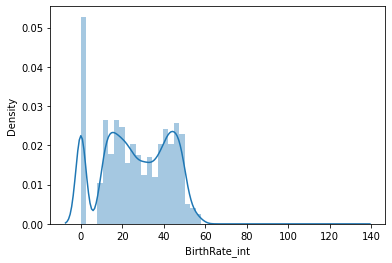

In [6]:
sns.distplot( birthrate_hist_df["BirthRate_int"] )

# Box plot

<AxesSubplot:xlabel='Country', ylabel='BirthRate'>

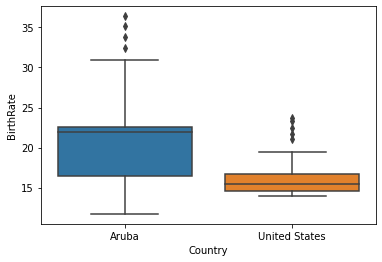

In [8]:
birthrate_box_df = birthrate_hist_df[(birthrate_hist_df["Country"]=="United States") | (birthrate_hist_df["Country"]=="Aruba")]
sns.boxplot(x = birthrate_box_df["Country"], y=birthrate_box_df["BirthRate"])

# Bullet chart

In [15]:
crime_bullet_df = crime_df[crime_df["state"]=="United States"][["state","burglary"]]
crime_bullet_df['target'] = 500
crime_bullet_tup = [tuple(x) for x in crime_bullet_df.values][0]



In [16]:
crime_bullet_tup

('United States', 726.7, 500)

In [21]:
crime_bullet_tup[0]

'United States'

In [18]:
limits = [300, 500, 1000]
palette = sns.color_palette("Blues_r", len(limits))

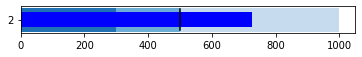

In [26]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels([2])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=75, color=palette[idx])
    prev_limit = lim
    
ax.barh([1], crime_bullet_tup[1], color='blue', height=45)

ax.axvline(crime_bullet_tup[2], color="black", ymin=0.10, ymax=0.9)

# Parallel Coordinate plot

In [27]:
education_df

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
0,United States,501,515,493,46,7.9,4.4
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6
5,California,500,513,498,49,10.9,5.5
6,Colorado,568,575,555,20,8.1,6.9
7,Connecticut,509,513,512,83,6.6,2.1
8,Delaware,495,498,484,71,7.9,5.5
9,District of Columbia,466,451,461,79,6.3,7.1


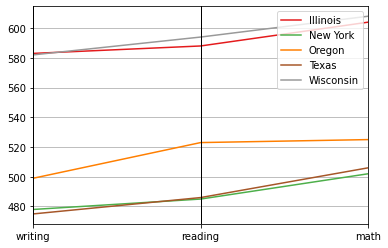

In [28]:
education_parallel_df = education_df[education_df['state'].isin(['New York','Texas','Oregon','Illinois','Wisconsin'])][['state','writing','reading','math']]

parallel_coordinates(education_parallel_df, 'state', colormap=plt.get_cmap("Set1"))
plt.show()

# Pie chart

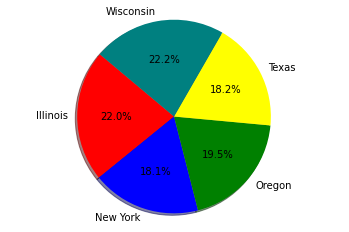

In [31]:
education_pie_df = education_parallel_df[['state','reading']]

colors = ['red', 'blue', 'green', 'yellow','teal']

plt.pie(education_pie_df['reading'], labels=education_pie_df['state'], colors=colors,
autopct='%2.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Donought chart

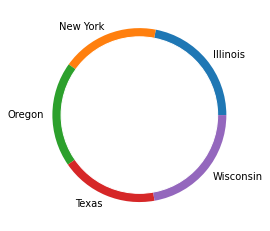

In [33]:
plt.pie(education_pie_df['reading'], labels=education_pie_df['state'])
 
my_circle=plt.Circle( (0,0), 0.9, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()